In [1]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [2]:
#Importing the data as panda dataframe
df_population = pd.read_csv('dbPopEstimatesByCMA2009-2019.csv')

df_population.head()

,REF_DATE,GEO,DGUID,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2009,"Montréal (CMA), Quebec",2016S0503462,Both sexes,All ages,Persons,249,units,0,v1060785691,44.1.1,3907597,NaN,NaN,NaN,0
1,2010,"Montréal (CMA), Quebec",2016S0503462,Both sexes,All ages,Persons,249,units,0,v1060785691,44.1.1,3953773,NaN,NaN,NaN,0
2,2011,"Montréal (CMA), Quebec",2016S0503462,Both sexes,All ages,Persons,249,units,0,v1060785691,44.1.1,3994492,NaN,NaN,NaN,0
3,2012,"Montréal (CMA), Quebec",2016S0503462,Both sexes,All ages,Persons,249,units,0,v1060785691,44.1.1,4031655,NaN,NaN,NaN,0
4,2013,"Montréal (CMA), Quebec",2016S0503462,Both sexes,All ages,Persons,249,units,0,v1060785691,44.1.1,4066332,NaN,NaN,NaN,0


In [3]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       66 non-null     int64  
 1   GEO            66 non-null     object 
 2   DGUID          66 non-null     object 
 3   Sex            66 non-null     object 
 4   Age group      66 non-null     object 
 5   UOM            66 non-null     object 
 6   UOM_ID         66 non-null     int64  
 7   SCALAR_FACTOR  66 non-null     object 
 8   SCALAR_ID      66 non-null     int64  
 9   VECTOR         66 non-null     object 
 10  COORDINATE     66 non-null     object 
 11  VALUE          66 non-null     int64  
 12  STATUS         0 non-null      float64
 13  SYMBOL         0 non-null      float64
 14  TERMINATED     0 non-null      float64
 15  DECIMALS       66 non-null     int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 8.4+ KB


In [4]:
#Dropping the empty columns (columns with 0 non-null count):
df_population = df_population.drop(['STATUS', 'SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis:
df_population = df_population.drop(['DGUID', 'Sex', 'Age group', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 
                                    'VECTOR', 'COORDINATE', 'DECIMALS'], axis=1)

df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   REF_DATE  66 non-null     int64 
 1   GEO       66 non-null     object
 2   VALUE     66 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [5]:
df_population

,REF_DATE,GEO,VALUE
0,2009,"Montréal (CMA), Quebec",3907597
1,2010,"Montréal (CMA), Quebec",3953773
2,2011,"Montréal (CMA), Quebec",3994492
3,2012,"Montréal (CMA), Quebec",4031655
4,2013,"Montréal (CMA), Quebec",4066332
...,...,...,...
61,2015,"Vancouver (CMA), British Columbia",2544484
62,2016,"Vancouver (CMA), British Columbia",2582202
63,2017,"Vancouver (CMA), British Columbia",2612874
64,2018,"Vancouver (CMA), British Columbia",2652306


In [6]:
df_population.groupby(['REF_DATE', 'GEO']).VALUE.mean()

REF_DATE  GEO                                    
2009      Calgary (CMA), Alberta                     1220700
          Edmonton (CMA), Alberta                    1163333
          Montréal (CMA), Quebec                     3907597
          Ottawa - Gatineau (CMA), Ontario/Quebec    1246116
          Toronto (CMA), Ontario                     5588312
                                                      ...   
2019      Edmonton (CMA), Alberta                    1447143
          Montréal (CMA), Quebec                     4318505
          Ottawa - Gatineau (CMA), Ontario/Quebec    1441118
          Toronto (CMA), Ontario                     6471850
          Vancouver (CMA), British Columbia          2691351
Name: VALUE, Length: 66, dtype: int64

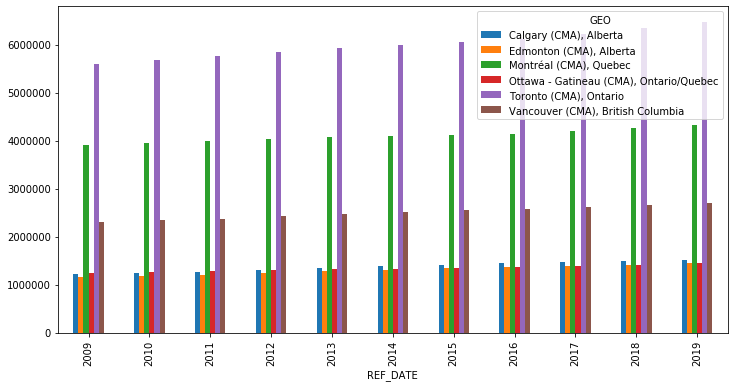

In [7]:
df_population.groupby(['REF_DATE', 'GEO']).VALUE.mean().unstack().plot.bar(figsize=(12,6));

In [8]:
#As seen, for all years investigated in this analysis, 
#Toronto, Montreal, and Vancouver are the most populated Canadian cities.